
https://www.geeksforgeeks.org/linear-regression-using-tensorflow/
https://www.machinelearningplus.com/deep-learning/linear-regression-tensorflow/

check the one note documents and notes you took


In [48]:
import tensorflow as tf
#correctly install tensorflow to the environment
# https://stackoverflow.com/questions/64859987/install-tensorflow-to-existing-anaconda-environment

import numpy as np
import matplotlib.pyplot as plt

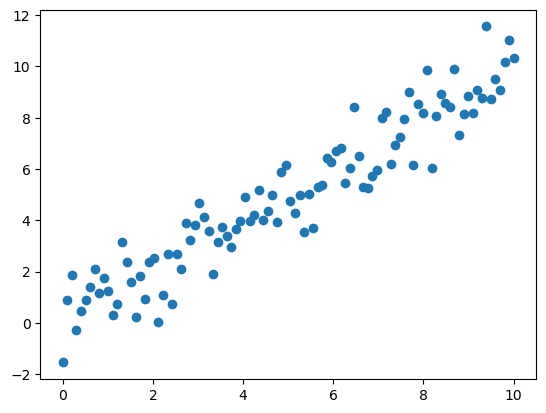

In [49]:
# Learning rate
learning_rate = 0.01

# Number of loops for training through all your data to update the parameters
training_epochs = 100

# the training dataset
x_train = np.linspace(0, 10, 100)
y_train = x_train + np.random.normal(0,1,100)

# plot of data
plt.scatter(x_train, y_train)

In [50]:
# declare weights
    #these initial values could be anything!    
weight = tf.Variable(0.)
bias = tf.Variable(0.)

In [51]:
# # x_train = np.asarray([1,2,3,4,5,52,41,124])
# # y_train = np.asarray([1,2,3,31,12, 20, 10, 123])

# training_epochs = 10


# #~here, my loss kept increasing, meaning my learning_rate was too big!

# learning_rate = 0.00001

In [52]:
# Define linear regression expression y
def linreg(x):
    y = weight*x + bias
    return y

In [53]:
# Define loss function (MSE)
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [54]:
# train model
for epoch in range(training_epochs):

    # Compute loss within Gradient Tape context
    with tf.GradientTape() as tape:
        #linreg is the function that I defined earlier, which is a line! (i could define another type of function, and it would work too!, such as sigmoid)
        y_predicted = linreg(x_train)
        
        #I then calculate the loss
        loss = squared_error(y_predicted, y_train)

        # Get gradients from gradient descent
        gradients = tape.gradient(loss, [weight,bias])

        # Adjust weights
            #basically, changes weights based on the gradient descent (which is the partial derivative of the given cost function)
        weight.assign_sub(gradients[0]*learning_rate)
        bias.assign_sub(gradients[1]*learning_rate)

        # Print output
        print(f"Epoch count {epoch}: Loss value: {loss.numpy()}")

Epoch count 0: Loss value: 33.762062072753906
Epoch count 1: Loss value: 4.161116600036621
Epoch count 2: Loss value: 1.2252557277679443
Epoch count 3: Loss value: 0.9340670704841614
Epoch count 4: Loss value: 0.9051803350448608
Epoch count 5: Loss value: 0.9023090600967407
Epoch count 6: Loss value: 0.9020178914070129
Epoch count 7: Loss value: 0.9019829630851746
Epoch count 8: Loss value: 0.9019731879234314
Epoch count 9: Loss value: 0.9019660949707031
Epoch count 10: Loss value: 0.9019594788551331
Epoch count 11: Loss value: 0.9019528031349182
Epoch count 12: Loss value: 0.9019461274147034
Epoch count 13: Loss value: 0.9019396901130676
Epoch count 14: Loss value: 0.9019333124160767
Epoch count 15: Loss value: 0.9019268751144409
Epoch count 16: Loss value: 0.9019206166267395
Epoch count 17: Loss value: 0.9019142985343933
Epoch count 18: Loss value: 0.9019081592559814
Epoch count 19: Loss value: 0.9019020199775696
Epoch count 20: Loss value: 0.9018959999084473
Epoch count 21: Loss val

In [55]:
print(weight.numpy())
print(bias.numpy())

0.97174525
0.124455795


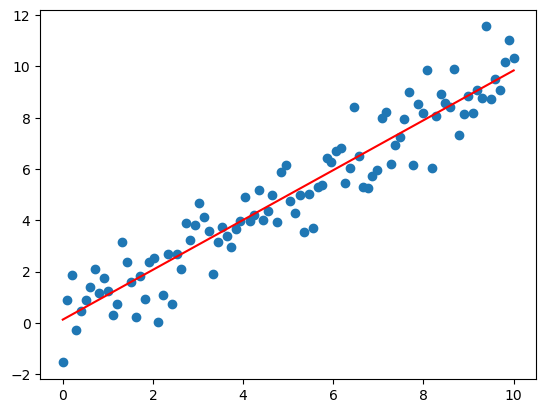

In [56]:
# Plot the best fit line
plt.scatter(x_train, y_train)
plt.plot(x_train, linreg(x_train), 'r')
plt.show()